# TEORIA E GESTÃO DE PORTFÓLIO 
---
A Teoria Moderna de Portfólio (MPT), desenvolvida por Harry Markowitz em 1952, revolucionou o campo da gestão de investimentos. O princípio central da MPT é construir portfólios de tal forma que maximizem o retorno esperado para um determinado nível de risco ou, equivalentemente, minimizem o risco para um dado nível de retorno esperado. Para alcançar isso, a MPT enfatiza a diversificação e a seleção de uma combinação de ativos que não são perfeitamente correlacionados



# Fronteira Eficiênte
---

No coração da Teoria Moderna do Portfólio (MPT) está o conceito de fronteira eficiente. Esta é uma representação gráfica de portfólios ótimos que oferecem o maior retorno esperado para um nível específico de risco. Os portfólios que se encontram na fronteira eficiente são considerados eficientes, pois representam as melhores opções de investimento nas condições dadas. Os portfólios abaixo da fronteira são subóptimos, pois oferecem retornos inferiores para um determinado nível de risco.
Para construir a fronteira eficiente, primeiro precisamos entender a relação entre risco e retorno dos ativos individuais e como eles se combinam dentro de um portfólio.

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import scipy.optimize as sco


# Selecionar os Ativos da Carteira 


In [20]:
ativos = ['ABEV3.SA', 'ITUB4.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'ELET3.SA']

df_ativos = yf.download(ativos, period='1y')['Adj Close']
df_ativos

[*********************100%%**********************]  6 of 6 completed


Ticker,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,VALE3.SA
Date,,,,,,
2023-08-09,13.665696,36.732304,25.597902,17.479160,25.580605,59.335655
2023-08-10,13.656193,36.860909,25.681675,17.880322,25.723372,58.634460
2023-08-11,13.646689,36.455299,25.728214,17.679741,25.664585,58.146286
2023-08-14,13.618179,36.010124,25.355885,16.781904,25.731770,56.599598
2023-08-15,13.494637,34.773510,25.216259,16.657736,25.916529,56.041832
...,...,...,...,...,...,...
2024-08-05,11.850000,37.689999,32.950001,13.970000,35.700001,57.020000
2024-08-06,12.010000,37.540001,33.680000,14.250000,36.320000,57.310001
2024-08-07,12.510000,37.820000,33.770000,14.600000,36.270000,57.200001


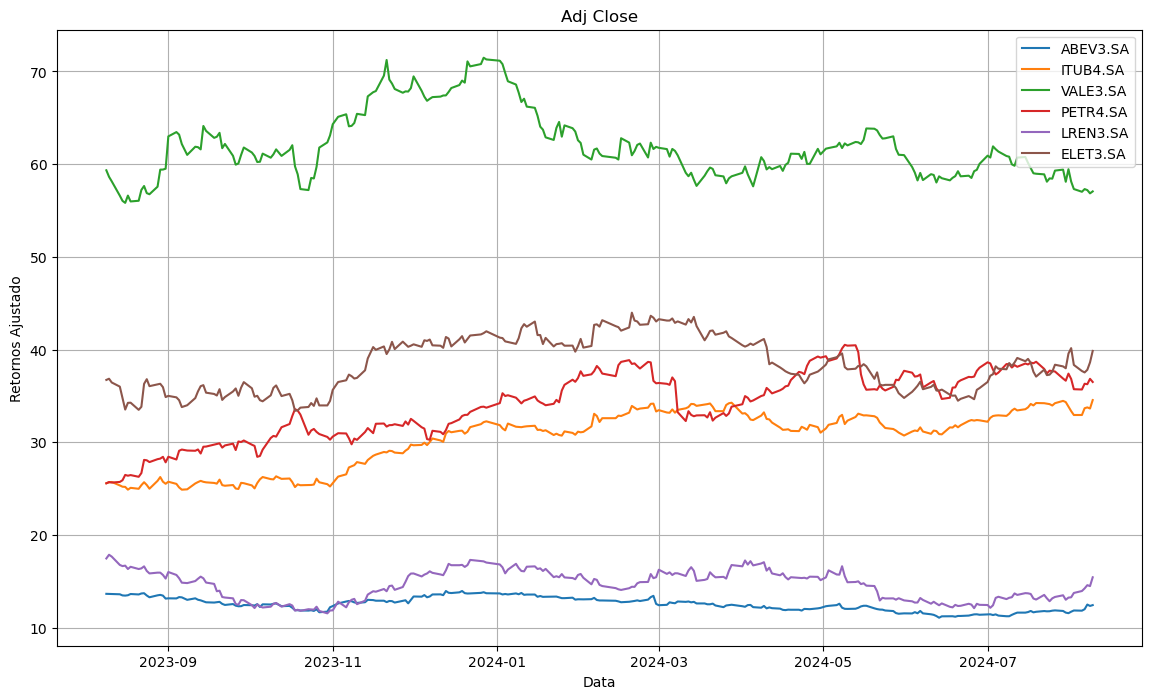

In [21]:
# Normalizando o gráfico dos Retornos Ajustados 
plt.figure(figsize=(14, 8))

# Plotar cada ativo individualmente com sua própria label
for ativo in ativos:
    plt.plot(df_ativos.index, df_ativos[ativo], label=ativo)

plt.title('Adj Close')
plt.xlabel('Data')
plt.ylabel('Retornos Ajustado')
plt.legend()
plt.grid(True)
plt.show()

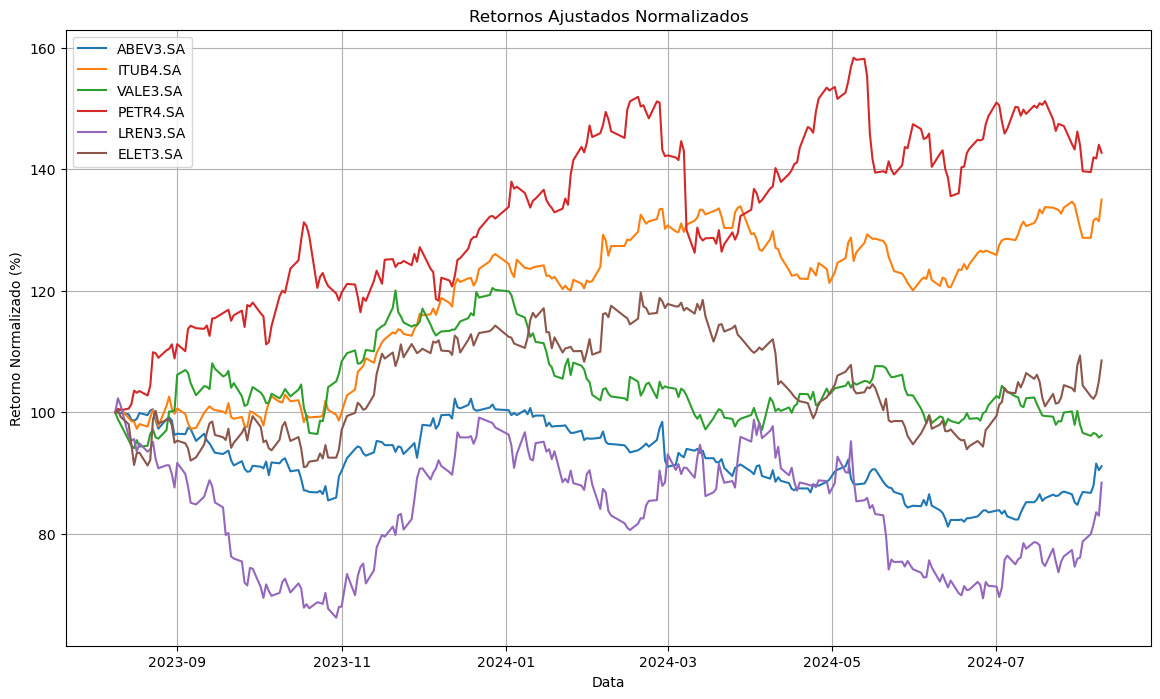

In [22]:
# Normalizando os dados para que comecem em 100
df_normalizado = (df_ativos / df_ativos.iloc[0]) * 100

# Plotar os dados normalizados
plt.figure(figsize=(14, 8))

# Plotar cada ativo individualmente com sua própria label
for ativo in ativos:
    plt.plot(df_normalizado.index, df_normalizado[ativo], label=ativo)

plt.title('Retornos Ajustados Normalizados')
plt.xlabel('Data')
plt.ylabel('Retorno Normalizado (%)')
plt.legend()
plt.grid(True)
plt.show()

# Calculando os Retornos 

In [23]:
# Calculando os Retornos Diários e Anuais dos Papéis
ret_diario = df_ativos.pct_change().dropna()
ret_anual = ret_diario.mean() * 252


# Calculando a Covariância


In [24]:
# Calculando os Retornos Médios e a  Covariância 
ret_medio = ret_diario.mean()
matriz_cov = ret_diario.cov()


# Iniciando a Simulação  

In [25]:
# Iniciando a Simulação
num_portifolio = 100000
resultado = np.zeros((3, num_portifolio))

for i in range(num_portifolio):
    pesos = np.random.random(len(ativos))
    pesos /= np.sum(pesos)
    retorno_portifolio = np.sum(ret_medio * pesos) * 252
    portifolio_risco = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos))) * np.sqrt(252)
    resultado[0,i] = retorno_portifolio
    resultado[1,i] = portifolio_risco
    resultado[2,i] = resultado[0,i] / resultado[1,i] # Sharpe ratio


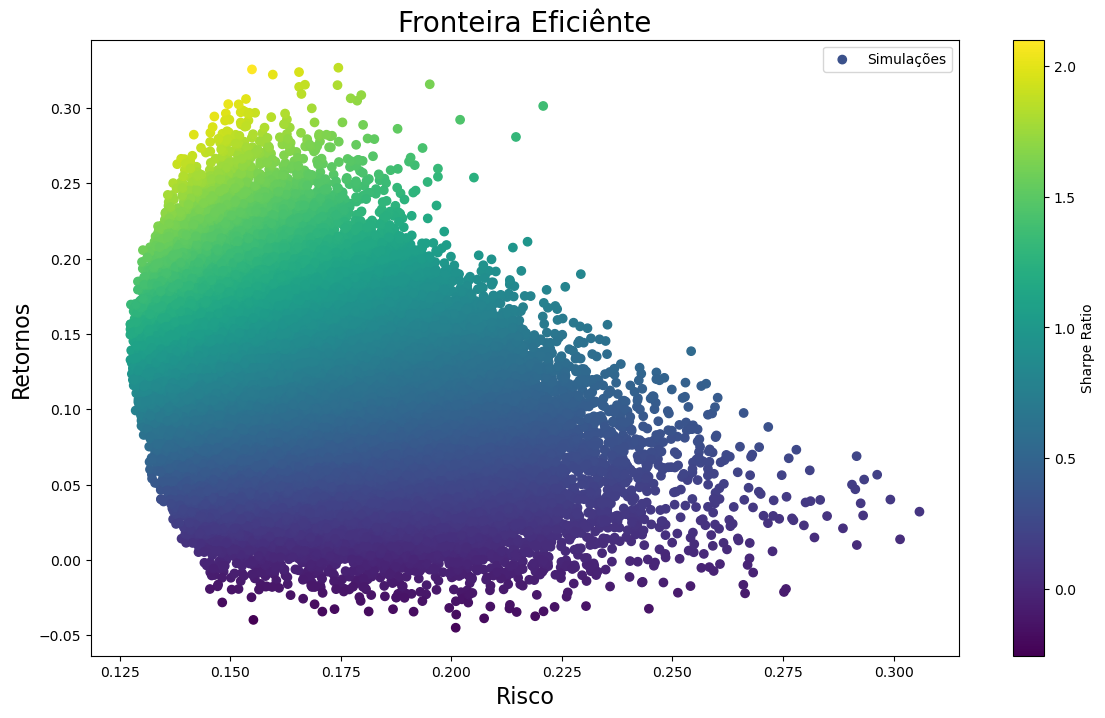

In [26]:
# Plotagem dos Resultados 
plt.figure(figsize=(14, 8))
plt.scatter(resultado[1,:], resultado[0,:], c=resultado[2,:], cmap='viridis', label='Simulações')
plt.xlabel('Risco', fontsize = 16)
plt.ylabel('Retornos', fontsize = 16)
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.title('Fronteira Eficiênte', fontsize = 20)
plt.show()


# Diversificação e Risco 
---
Um dos pilares da Teoria Moderna do Portfólio (MPT) é a diversificação. Ao combinar ativos com diferentes perfis de risco e retorno, os investidores podem reduzir o risco geral do portfólio. O risco de um portfólio não é apenas a soma ponderada dos riscos individuais dos ativos, mas também depende das correlações entre os retornos dos ativos. Uma correlação mais baixa entre os ativos geralmente resulta em melhores benefícios de diversificação.

## Calculando a Correlação 

In [27]:
matriz_corr = ret_diario.corr()
matriz_corr

Ticker,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,VALE3.SA
Ticker,,,,,,
ABEV3.SA,1.000000,0.362295,0.412427,0.289288,-0.048906,0.138457
ELET3.SA,0.362295,1.000000,0.475836,0.440014,0.080798,0.188068
ITUB4.SA,0.412427,0.475836,1.000000,0.470521,0.023554,0.200634
LREN3.SA,0.289288,0.440014,0.470521,1.000000,0.049127,0.220102
PETR4.SA,-0.048906,0.080798,0.023554,0.049127,1.000000,0.190908
VALE3.SA,0.138457,0.188068,0.200634,0.220102,0.190908,1.000000


## Otimização de Média e Variância
---

A Teoria Moderna do Portfólio (MPT) utiliza a otimização de média-variação para encontrar os pesos de portfólio ideais que maximizam o retorno esperado para um determinado nível de risco. Isso envolve a resolução de um problema de programação quadrática onde o objetivo é maximizar o retorno do portfólio enquanto minimiza a variância.

In [28]:
# Função para calcular o retorno e o risco do portfólio
def melhor_portifolio(pesos, ret_medio, matriz_cov):
    retorno_portifolio = np.sum(ret_medio * pesos) * 252
    portifolio_risco = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos))) 
    return retorno_portifolio, portifolio_risco

In [29]:
# Função para encontrar o portfólio de mínima variância
def min_variancia(ret_medio, matriz_cov):
    num_ativos = len(ret_medio)
    args = (ret_medio, matriz_cov)
    restricoes = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    limites = tuple((0, 1) for _ in range(num_ativos))
    
    resultado = sco.minimize(lambda pesos: melhor_portifolio(pesos, *args)[1],
                             num_ativos * [1./num_ativos], method='SLSQP',
                             bounds=limites, constraints=restricoes)
    return resultado


### Encontre o portfólio de mínima variância

In [30]:
# Calculando o portfólio de mínima variância
min_var_port = min_variancia(ret_medio, matriz_cov)

# Imprimindo o retorno e o risco do portfólio de mínima variância
print(f'Menor Variância do Portifólio: Retorno = {melhor_portifolio(min_var_port.x, ret_medio, matriz_cov)[0]:.4f}, '
      f'Risco = {melhor_portifolio(min_var_port.x, ret_medio, matriz_cov)[1]:.4f}')

Menor Variância do Portifólio: Retorno = 0.1317, Risco = 0.0080


#### Resultado
---
O resultado dessa otimização fornece os pesos dos ativos que compõem a carteira de mínima variância, que está situada na fronteira eficiente.

# Linha do Mercado de Capitais e o Portfólio Tangente
---
* ` Linha de Mercado de Capitais (CML)` representa portfólios que combinam de forma otimizada ativos livres de risco e o portfólio de mercado.
* ` Portifólio Tangente`  é o ponto onde a CML toca a fronteira eficiente e representa o portfólio com a maior razão de Sharpe. Para encontrar o portfólio de tangência, precisamos incorporar a taxa livre de risco em nossa otimização.

In [31]:
# Definindo o Menor Índice de Sharpe
def neg_sharpe_ratio(pesos, ret_medio, matriz_cov, taxa_livre_de_risco):
    # Calcular o índice de Sharpe negativo
    p_retornos, p_risco = melhor_portifolio(pesos, ret_medio, matriz_cov)
    return -(p_retornos - taxa_livre_de_risco) / p_risco

In [32]:
# Definindo o Maior Índice de Sharpe
def max_sharpe_ratio(ret_medio, matriz_cov, taxa_livre_de_risco):
    num_ativos = len(ativos)
    args = (ret_medio, matriz_cov, taxa_livre_de_risco)
    restricoes = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    limites = tuple((0, 1) for _ in range(num_ativos))
    
    resultado = sco.minimize(neg_sharpe_ratio, num_ativos * [1./num_ativos], args=args, 
                             method='SLSQP', bounds=limites, constraints=restricoes)
    return resultado

In [33]:
# Assumindo que a Taxa Livre de Risco do Brasil em 2024 atualmente seja de 11,68%
taxa_livre_de_risco = 0.1168


# Encontrando o Portfólio de Máxima Tângencia (Melhor Sharpe Ratio)
tangencia_port = max_sharpe_ratio(ret_medio, matriz_cov, taxa_livre_de_risco)

# Imprimindo o retorno e o risco do portfólio de mínima variância
print(f'Portfólio de Tangência: Retorno = {melhor_portifolio(tangencia_port.x, ret_medio, matriz_cov)[0]:.4f}, '
      f'Risco = {melhor_portifolio(tangencia_port.x, ret_medio, matriz_cov)[1]:.4f}')

Portfólio de Tangência: Retorno = 0.3485, Risco = 0.0097


####  Resultado 
O portfólio de tangência oferece o mais alto nível de retorno esperado por unidade
de risco, tornando-o uma escolha ideal para investidores avessos ao risco que buscam
otimizar seu portfólio.

A Teoria Moderna de Portfólio oferece uma abordagem sistemática para a construção e otimização de portfólios. Ao utilizar Python, podemos computar eficientemente a fronteira eficiente, otimizar portfólios e avaliar seu desempenho.

# Traçando a Fronteira Eficiente e o Portfólio de Tangência

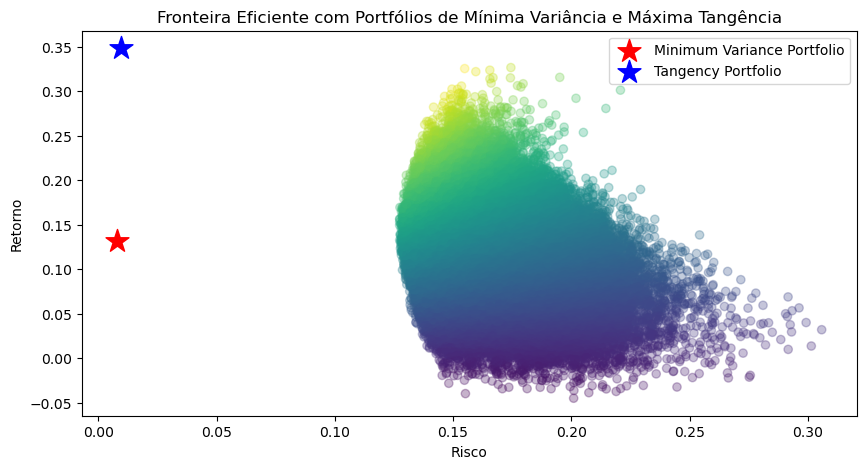

In [34]:
# Plotando a fronteira eficiente
plt.figure(figsize=(10, 5))

# Plotar a fronteira eficiente
plt.scatter(resultado[1, :], resultado[0, :], c=resultado[2, :], cmap='viridis', marker='o', alpha=0.3)

# Plotar o portfólio de mínima variância
ret_min_var, risco_min_var = melhor_portifolio(min_var_port.x, ret_medio, matriz_cov)
plt.scatter(risco_min_var, ret_min_var, marker='*', color='r', s=300, label='Minimum Variance Portfolio')

# Plotar o portfólio de máxima tangência
ret_tangencia, risco_tangencia = melhor_portifolio(tangencia_port.x, ret_medio, matriz_cov)
plt.scatter(risco_tangencia, ret_tangencia, marker='*', color='b', s=300, label='Tangency Portfolio')

plt.title('Fronteira Eficiente com Portfólios de Mínima Variância e Máxima Tangência')
plt.xlabel('Risco')
plt.grid(False)
plt.ylabel('Retorno')
plt.legend()
plt.show()               

In [8]:
len(ativos)

7